### Data Visualization IS445 (Spring 2024) Final Project - Peers

##### Name of dataset: NFL 2019 play by play data¶

Dataset link: https://nflsavant.com

Dataset download: https://nflsavant.com/pbp_data.php?year=2019

License: NFLsavant.com’s data is freely and openly available to anyone in public. There is no cost to access and use the data.

Size: pbp-2019.csv is 9.18 MB

##### Characteristics of this dataset:
NFLsavant.com is a web site dedicated to providing advanced NFL statistics in a simple to use interface. All data and stats from this site are compiled from publicly-available NFL play-by-play data on the internet. There are 42,187 rows by 41 columns in the 2019 file. The data consists of strings and numbers.

##### My experience with the dataset:
Initially, I took and started working with the 2023 regular season file. That file was roughly 39K rows and 45 columns. After playing with the data, I discovered that it was incomplete. I assumed that all 272 games were accounted for but learned that the data stopped at Week 14. So, there were 64 games missing from the 2023 statistics. I went back to NFLsavant.com and found that the 2019 season was the most recent complete season featuring 256 games. The thing I like about playing with this data, was that I could confirm different facts online. I noticed 2023 was incomplete when I couldn’t find the Dallas Cowboys longest pass play from Week 17. 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# redo the file location of the input data

nflseason = pd.read_csv(r'C:\Users\andre\Downloads\pbp-2019.csv')

In [4]:
df = pd.DataFrame(nflseason)

In [5]:
# Convert the column to datetime and add columns for day of the week and month that the game was played
df['GameDate'] = pd.to_datetime(df['GameDate'])
df['DayOfWeek'] = df['GameDate'].dt.strftime('%a')
df['Month'] = df['GameDate'].dt.strftime('%b')

# Delete rows where the play did not occur because of a TIMEOUT or END QUARTER
indexYardLine = df[(df['YardLine'] == 0)].index
df.drop(indexYardLine, inplace=True)

indexDown = df[(df['Down'] == 0)].index
df.drop(indexDown, inplace=True)

# Delete rows where there wasn't a play that generated yardage
indexPlayType = df[(df['PlayType'] == 'CLOCK STOP') | (df['PlayType'] == 'EXCEPTION') | (df['PlayType'] == 'EXTRA POINT') | (df['PlayType'] == 'FIELD GOAL') | (df['PlayType'] == 'FUMBLES') | (df['PlayType'] == 'KICK OFF')  | (df['PlayType'] == 'TWO-POINT CONVERSION') | (df['PlayType'] == 'NO PLAY')   | (df['PlayType'] == 'TIMEOUT')| (df['PlayType'] == 'PENALTY')| (df['PlayType'] == 'QB KNEEL') | (df['PlayType'] == 'PUNT')].index
df.drop(indexPlayType, inplace=True)


### A variation on the original 32 subplots that just features four graphs grouped by play

PlayType     PASS  RUSH  SACK  SCRAMBLE
OffenseTeam                            
ARI          3716  1828  -320       243
ATL          5035  1190  -337       161
BAL          3426  2352  -116       399
BUF          3215  1667  -228       315
CAR          4144  1739  -458       123
CHI          3733  1218  -273       122
CIN          4208  1291  -331       114
CLE          4161  1729  -267       105
DAL          4960  1901  -153       133
DEN          3427  1583  -279        94
DET          4352  1503  -296       198
GB           3904  1517  -295       218
HOU          3935  1643  -253       269
IND          3463  1888  -178       235
JAX          4010  1375  -258       372
KC           4890  1261  -210       234
LA           4431  1353  -177        21
LAC          4868  1384  -217        28
LV           3954  1741  -173        77
MIA          4124   821  -305       296
MIN          3863  2024  -245        50
NE           4085  1429  -189        36
NO           4375  1631  -200       108


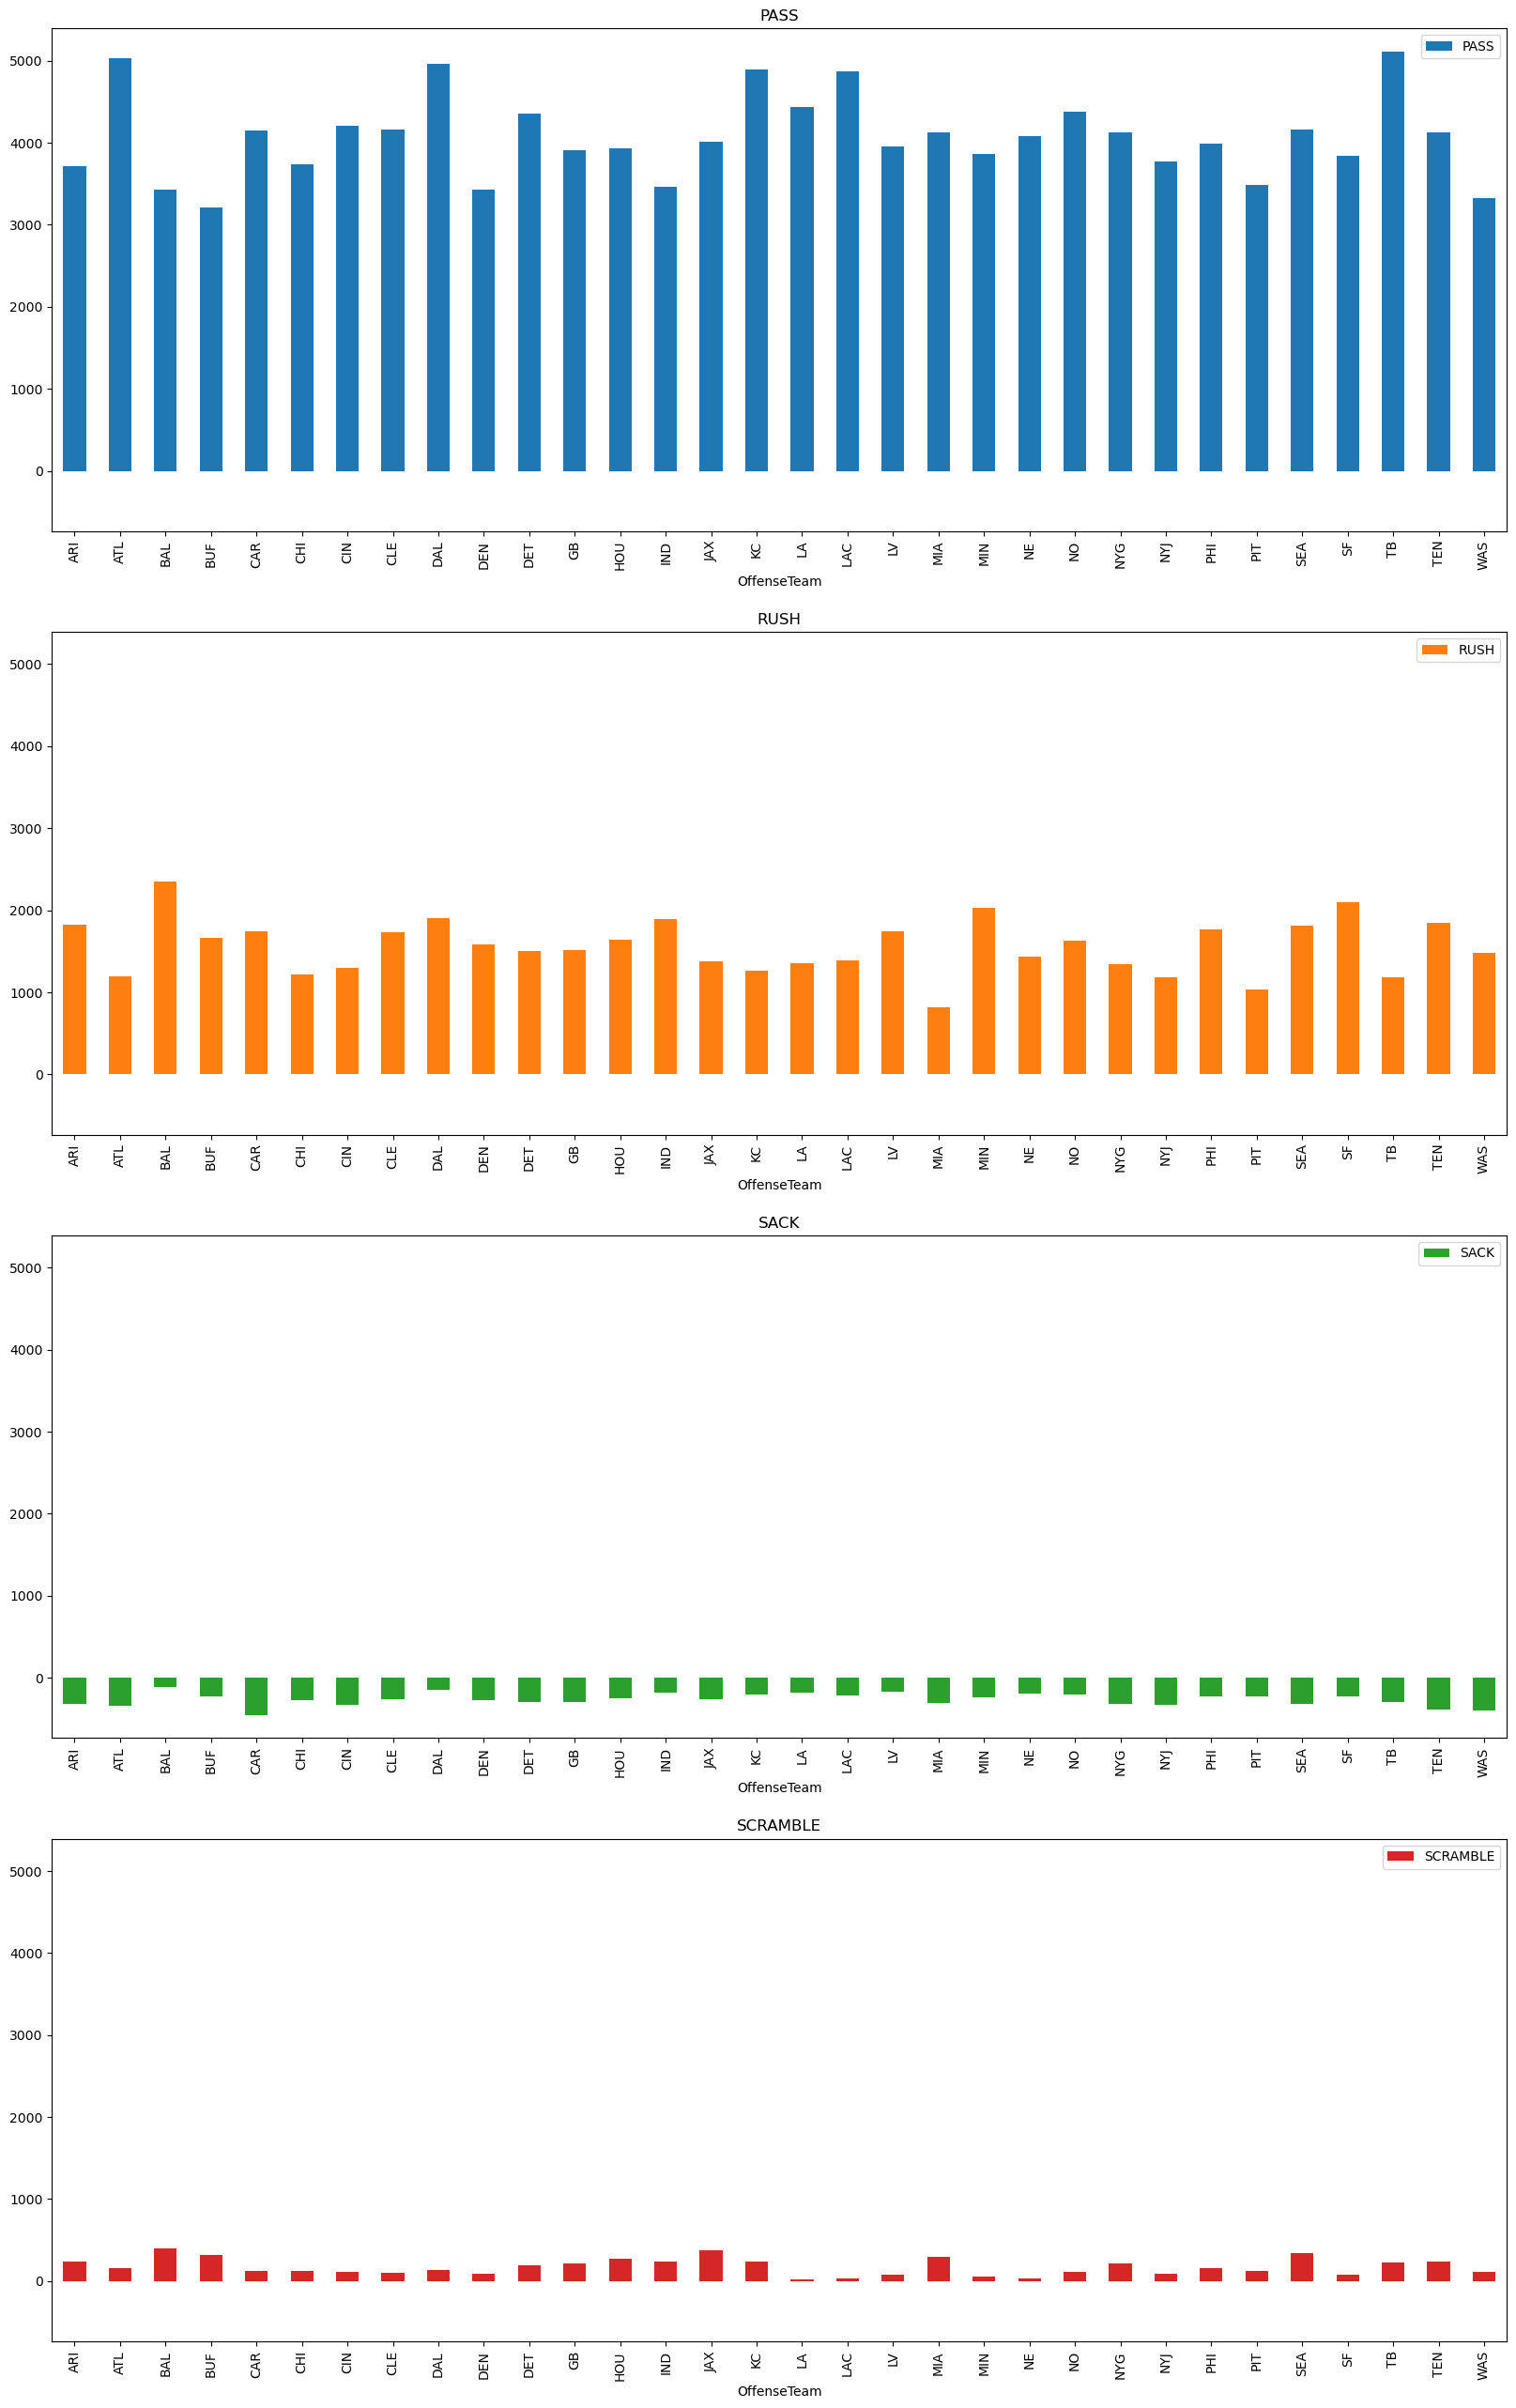

In [6]:
# result 

pivot_table = pd.pivot_table(df.reset_index(), index=['OffenseTeam'], columns=['PlayType'], values='Yards', aggfunc='sum')
pivot_table.plot(subplots=True, layout=(4,1), figsize=(20,32), kind='bar', sharex=False, sharey=True)
print(pivot_table)

### Showing both offensive and defensive totals for game that were played on Sundays

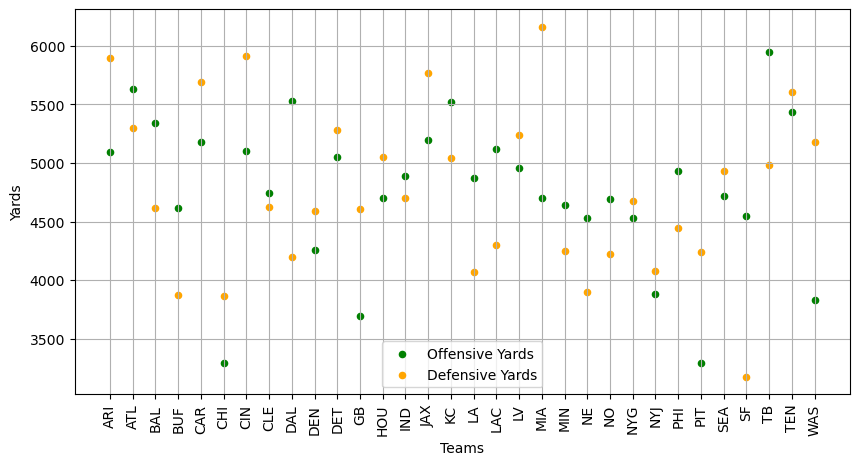

In [7]:
# Used the subset data for only games that were played on Sunday. Wanted to graph both the offensive and defensive yards for a team.

filteredSUN_df = df[(df['DayOfWeek'] == 'Sun')]
filteredMON_df = df[(df['DayOfWeek'] == 'Mon')]

dayyardsSUN = filteredSUN_df.groupby(['OffenseTeam'])['Yards'].sum().reset_index().rename(columns={"index": "Team", 0: "Yards"})
dayyardsSUND = filteredSUN_df.groupby(['DefenseTeam'])['Yards'].sum().reset_index().rename(columns={"index": "Team", 0: "Yards"})

#plt.style.use('_mpl-gallery')
df1 = dayyardsSUN
df2 = dayyardsSUND
ax = df1.plot.scatter(x='OffenseTeam', y='Yards', color ='green', figsize = (10,5))
df2.plot.scatter(ax=ax, x='DefenseTeam', y = 'Yards', color = 'orange')
plt.legend(['Offensive Yards','Defensive Yards'])
plt.xlabel('Teams')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

### Attempted a radial bar chart to show offensive yardarge by team for Sunday games

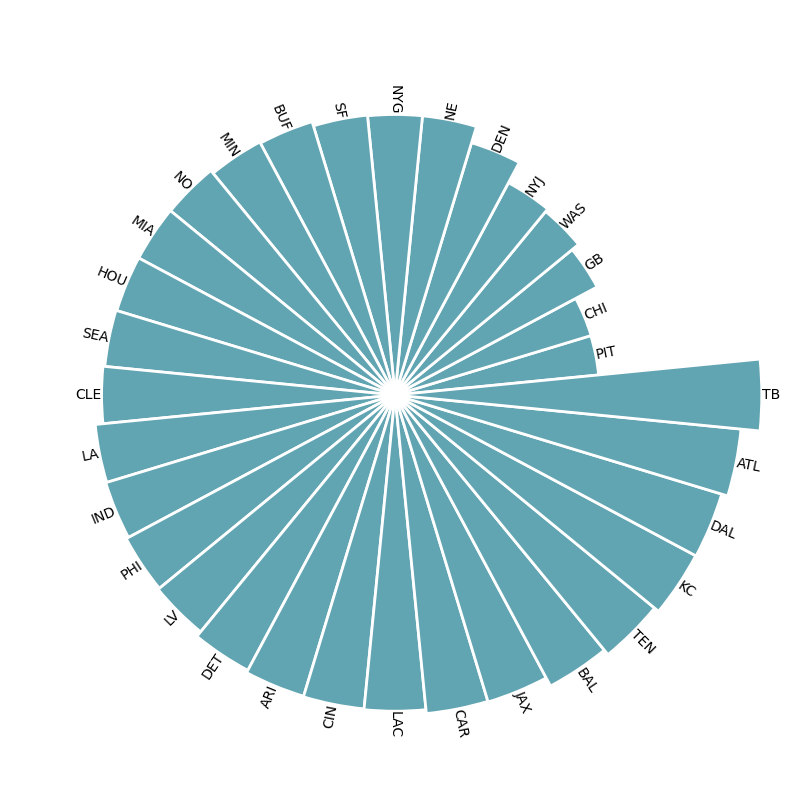

In [8]:
# Found code for a radial bar chart as another way to show the offense

filteredSUN_df = df[(df['DayOfWeek'] == 'Sun')]
dayyardsSUN = filteredSUN_df.groupby(['OffenseTeam'])['Yards'].sum().reset_index().rename(columns={"index": "Team", 0: "Yards"})

# Build a dataset
df = pd.DataFrame({'Name': dayyardsSUN["OffenseTeam"], 'Value': dayyardsSUN["Yards"]})

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [ ]:
# Played with pulling in a graphic image.

#from PIL import Image
#img = Image.open(r"C:\Users\andre\Downloads\Baltimore_Ravens_logo.svg.png")
#img.show()